# Gráficos de barras misiones (versión 2)

### 1. Creando datos falsos pero similares

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Creo valores aleatorios similares a los de las misiones

# Generar los nombres con el formato especificado
names_positivos = []
for i in range(1, 6):
    for j in range(1, 11):
        names_positivos.append(f"M{i}.{j}")

# Generar los valores aleatorios entre 0 y 3
values_positivos = np.random.randint(0, 4, 50)

# Crear el DataFrame
df_positivos = pd.DataFrame({'Name': names_positivos, 'Value': values_positivos})

# Añadir la columna "Mision" con los primeros dos caracteres de "Name"
df_positivos['Mision'] = df_positivos['Name'].str[:2]

# Imprimir el DataFrame
print("DF con valores positivos")
print(df_positivos.head(15))




# Generar DF para valores negativos
names_negativos = []
for i in range(1, 6):
    for j in range(1, 11):
        names_negativos.append(f"M{i}.{j}")

# Generar los valores aleatorios entre 0 y 3
values_negativos = np.random.randint(-3, 1, 50)

# Crear el DataFrame
df_negativos = pd.DataFrame({'Name': names_negativos, 'Value': values_negativos})

# Añadir la columna "Mision" con los primeros dos caracteres de "Name"
df_negativos['Mision'] = df_negativos['Name'].str[:2]

# Imprimir el DataFrame
print("DF con valores negativos")
print(df_negativos.head(15))



DF con valores positivos
     Name  Value Mision
0    M1.1      0     M1
1    M1.2      3     M1
2    M1.3      1     M1
3    M1.4      0     M1
4    M1.5      1     M1
5    M1.6      2     M1
6    M1.7      2     M1
7    M1.8      2     M1
8    M1.9      2     M1
9   M1.10      1     M1
10   M2.1      2     M2
11   M2.2      1     M2
12   M2.3      3     M2
13   M2.4      0     M2
14   M2.5      3     M2
DF con valores negativos
     Name  Value Mision
0    M1.1     -2     M1
1    M1.2     -1     M1
2    M1.3     -2     M1
3    M1.4     -1     M1
4    M1.5     -1     M1
5    M1.6     -3     M1
6    M1.7      0     M1
7    M1.8     -3     M1
8    M1.9     -3     M1
9   M1.10     -2     M1
10   M2.1     -1     M2
11   M2.2     -3     M2
12   M2.3     -3     M2
13   M2.4     -3     M2
14   M2.5     -2     M2


### 2. Generando gráfico inicial con una sola serie

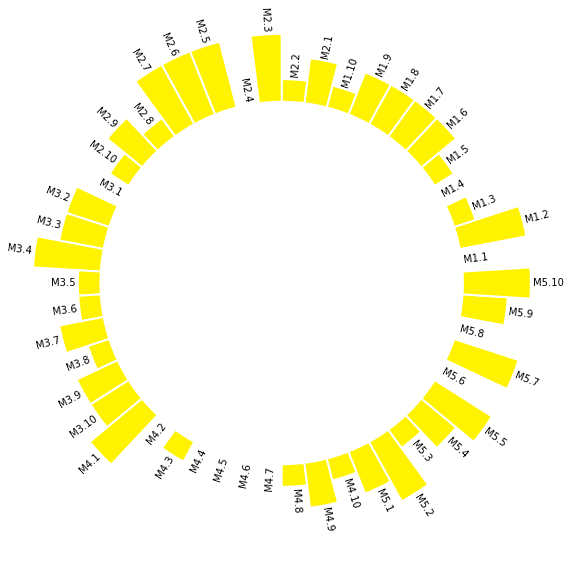

In [46]:
# set figure size
plt.figure(figsize=(20,10))

# plot polar axis
ax = plt.subplot(111, polar=True)

# remove grid
plt.axis('off')

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-8, 4)


# Set the coordinates limits
upperLimit = 3
lowerLimit = 0

# Compute max and min in the dataset
max = df_positivos['Value'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_positivos.Value + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_positivos.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_positivos.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="#FFF300")


# little space between the bar and the label
labelPadding = 0.1

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_positivos["Name"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 


# Agrupando valores

### Creando primero unas funciones

In [47]:
# The following is a helper function that given the angle at which the bar is positioned and the offset used in the barchart, determines the rotation and alignment of the labels

def get_label_rotation(angle, offset):
    # Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle + offset)
    if angle <= np.pi:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"
    return rotation, alignment

In [51]:
# And this is the function that actually adds the labels (with ax.text()) to the plot:

def add_labels(angles, values, labels, offset, ax):
    
    # This is the space between the end of the bar and the label
    padding = 0.1
    
    # Iterate over angles, values, and labels, to add all of them.
    for angle, value, label, in zip(angles, values, labels):
        angle = angle
        
        # Obtain text rotation and alignment
        rotation, alignment = get_label_rotation(angle, offset)

        # And finally add the text
        ax.text(
            x=angle, 
            y=value + padding, 
            s=label, 
            ha=alignment, 
            va="center", 
            rotation=rotation, 
            rotation_mode="anchor"
        ) 

### Creando gráfico circular usando funciones

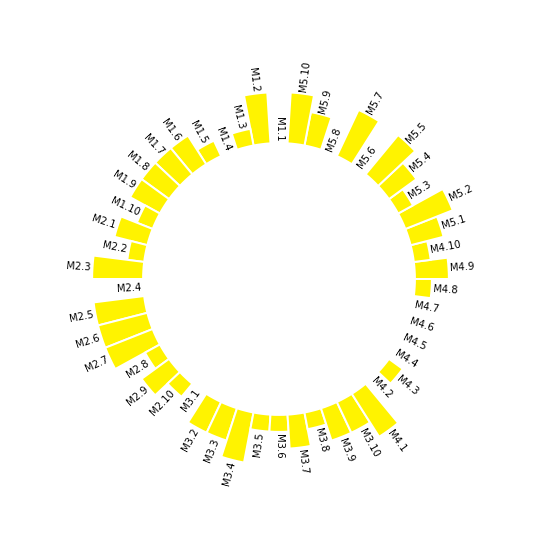

In [52]:
# Before creating a circular barplot with groups, let's review how to create a circular barplot with labels at the end of each bar. First of all, let's create ANGLES, which give the positions where bars are located. The VALUES array contains the heights of the bars, and LABELS stores the labels.

ANGLES = np.linspace(0, 2 * np.pi, len(df_positivos), endpoint=False)
VALUES = df_positivos["Value"].values
LABELS = df_positivos["Name"].values

# Determine the width of each bar. 
# The circumference is '2 * pi', so we divide that total width over the number of bars.
WIDTH = 2 * np.pi / len(VALUES)

# Determines where to place the first bar. 
# By default, matplotlib starts at 0 (the first bar is horizontal)
# but here we say we want to start at pi/2 (90 deg)
OFFSET = np.pi / 2

# Initialize Figure and Axis
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

# Specify offset
ax.set_theta_offset(OFFSET)

# Set limits for radial (y) axis. The negative lower bound creates the whole in the middle.
ax.set_ylim(-8, 8)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

# Remove all spines
ax.set_frame_on(False)

# Remove grid and tick marks
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars
ax.bar(
    ANGLES, VALUES, width=WIDTH, linewidth=2,
    color="#FFF300", edgecolor="white"
)

# Add labels
add_labels(ANGLES, VALUES, LABELS, OFFSET, ax)

### Añadiendo espacios en el círculo

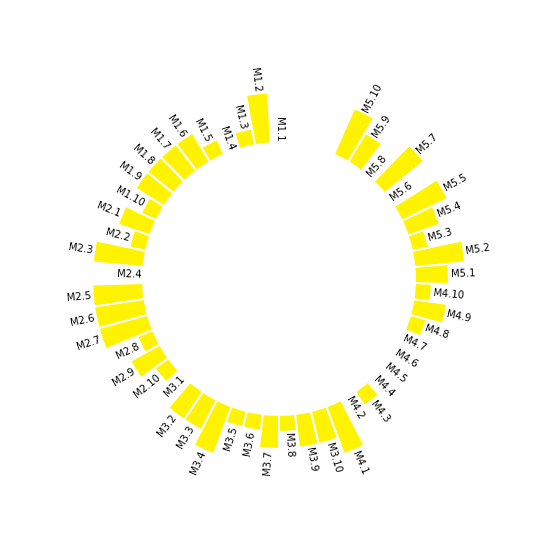

In [55]:
#The next step is to build a circular barplot with a break in the circle. Actually, the approach is just to increase the number of values in ANGLES, but leaving some of them unused so it creates the gap.

# 3 empty bars are added 
PAD = 3
ANGLES_N = len(VALUES) + PAD
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# The index contains non-empty bards
IDXS = slice(0, ANGLES_N - PAD)

# The layout customization is the same as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-8, 8)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Add bars, subsetting angles to use only those that correspond to non-empty bars
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color="#FFF300", 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Añadiendo espacios entre grupos

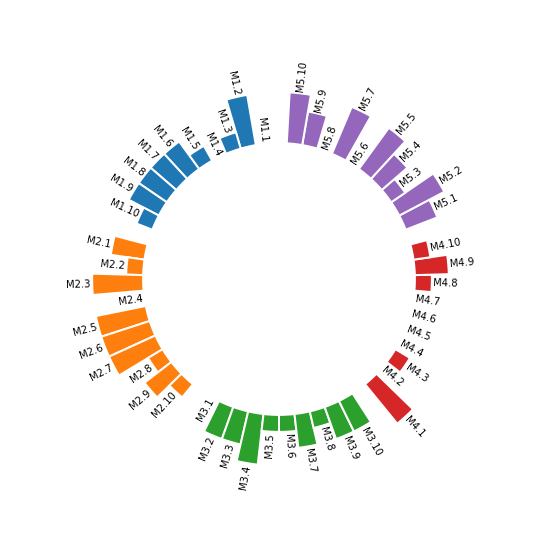

In [83]:
#This concept can now be used to add space between each group of the dataset. In this case, PAD empty bars are added at the end of each group.

#This chart is far more insightful since it allows one to quickly compare the different groups, and to compare the value of items within each group.

# Grab the group values
GROUP = df_positivos["Mision"].values

# Add a "X" empty bars to the end of each group
PAD = 1
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

# Obtaining the right indexes is now a little more complicated
offset = 0
IDXS = []
GROUPS_SIZE = [10, 10, 10, 10, 10]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

# Same layout as above
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})

ax.set_theta_offset(OFFSET)
ax.set_ylim(-8, 8)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

# Use different colors for each group!
GROUPS_SIZE = [10, 10, 10, 10, 10]
COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]

# And finally add the bars. 
# Note again the `ANGLES[IDXS]` to drop some angles that leave the space between bars.
ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

### Personalizando diagrama

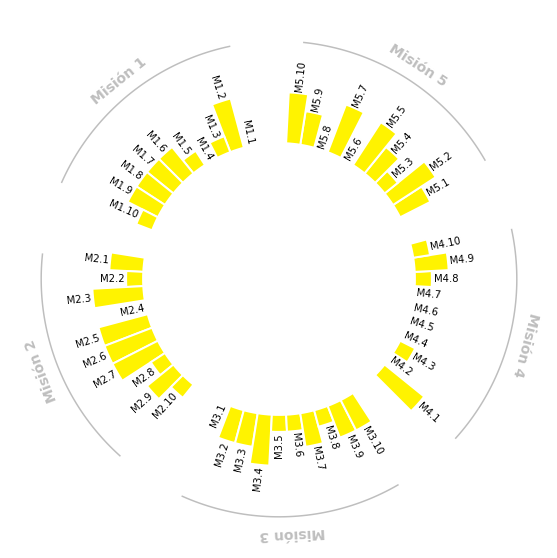

In [130]:
# All this part is like the code above
VALUES = df_positivos["Value"].values
LABELS = df_positivos["Name"].values
GROUP = df_positivos["Mision"].values

PAD = 2
ANGLES_N = len(VALUES) + PAD * len(np.unique(GROUP))
ANGLES = np.linspace(0, 2 * np.pi, num=ANGLES_N, endpoint=False)
WIDTH = (2 * np.pi) / len(ANGLES)

offset = 0
IDXS = []
GROUPS_SIZE = [10, 10, 10, 10, 10]
for size in GROUPS_SIZE:
    IDXS += list(range(offset + PAD, offset + size + PAD))
    offset += size + PAD

fig, ax = plt.subplots(figsize=(20, 10), subplot_kw={"projection": "polar"})
ax.set_theta_offset(OFFSET)
ax.set_ylim(-8, 8)

# Set the background color to white for both figure and axes
ax.patch.set_facecolor('white')
fig.patch.set_facecolor('white')

ax.set_frame_on(False)
ax.xaxis.grid(False)
ax.yaxis.grid(False)
ax.set_xticks([])
ax.set_yticks([])

GROUPS_SIZE = [10, 10, 10, 10, 10]
#COLORS = [f"C{i}" for i, size in enumerate(GROUPS_SIZE) for _ in range(size)]
COLORS = ['#FFF300'] * len(IDXS)  # Set all colors to #FFF300


ax.bar(
    ANGLES[IDXS], VALUES, width=WIDTH, color=COLORS, 
    edgecolor="white", linewidth=2
)

add_labels(ANGLES[IDXS], VALUES, LABELS, OFFSET, ax)

# Extra customization below here --------------------

# This iterates over the sizes of the groups adding reference
# lines and annotations.

offset = 0 
for group, size in zip(["Misión 1", "Misión 2", "Misión 3", "Misión 4", "Misión 5"], GROUPS_SIZE):
    # Add line above bars
    x1 = np.linspace(ANGLES[offset + PAD], ANGLES[offset + size + PAD - 1], num=50)
    ax.plot(x1, [6] * 50, color="#bebebe")
    
    # Add text to indicate group
    text_angle = np.mean(x1) * 180 / np.pi  # Convert to degrees
    ax.text(
        np.mean(x1), 7, group, color="#bebebe", fontsize=14, 
        fontweight="bold", ha="center", va="center", rotation=text_angle
    )
    
    # Add reference lines
    # reference_values = [1, 2, 3, -3, -2, -1]
    # for value in reference_values:
    #     ax.plot(ANGLES[offset:offset+size+1], [value] * (size+1), color="#bebebe", lw=0.8, linestyle='--')
    #     ax.text(
    #         np.mean(ANGLES[offset:offset+size+1]), value + 2, str(value), 
    #         color="#bebebe", fontsize=12, ha="center", va="center"
    #     )
    
    offset += size + PAD

plt.show()


### Añadiendo serie negativa

In [45]:
df_combined

,Name,Value,Mision
0,M1.1,0,M1
1,M1.2,3,M1
2,M1.3,1,M1
3,M1.4,0,M1
4,M1.5,1,M1
...,...,...,...
45,M5.6,-3,M5
46,M5.7,-1,M5
47,M5.8,-2,M5
48,M5.9,-2,M5


In [77]:
df_positivos

,Name,Value,Mision
0,M1.1,0,M1
1,M1.2,3,M1
2,M1.3,1,M1
3,M1.4,0,M1
4,M1.5,1,M1
5,M1.6,2,M1
6,M1.7,2,M1
7,M1.8,2,M1
8,M1.9,2,M1
9,M1.10,1,M1
